# melのチェックを行う用のノートブック

In [ ]:
# ここに確認したいwavを配置.

input_wav_paths = ['./pre_voice/Universal/jsut_ver1.1_BASIC5000_0001.wav', './pre_voice/Universal/VCTK-Corpus_p257_256.wav']

p_config = './config/JSUT_JSSS/preprocess.yaml'

In [ ]:
# まずは, NARS2Sのほう.
import yaml

from utils.utils import get_mels, plot_mels

preprocess_config = yaml.load(
        open(p_config, "r", encoding='utf-8'), Loader=yaml.FullLoader
    )
mels = get_mels(wav_paths=input_wav_paths, config=preprocess_config, mel_num=80)

plot_mels(mels, input_wav_paths, sr=preprocess_config["preprocessing"]["audio"]["sampling_rate"], sharex=False)

In [ ]:
# hifiganのものでmelを作ってみる.
import os

from tqdm import tqdm
import torch

from hifigan.meldataset import load_wav, mel_spectrogram

mels = []

sr = preprocess_config["preprocessing"]["audio"]["sampling_rate"]
n_fft = preprocess_config["preprocessing"]["stft"]["filter_length"]
num_mels = preprocess_config["preprocessing"]["mel"]["n_mel_channels"]
hop_size = preprocess_config["preprocessing"]["stft"]["hop_length"]
win_size = preprocess_config["preprocessing"]["stft"]["win_length"]
fmin = preprocess_config["preprocessing"]["mel"]["mel_fmin"]
fmax = preprocess_config["preprocessing"]["mel"]["mel_fmax"]

for wav_path in tqdm(input_wav_paths):
    audio, sampling_rate = load_wav(wav_path, sr)
    assert sampling_rate == sr
    # audio = audio / 32768.0
    audio = torch.FloatTensor(audio).to("cuda")
    audio = audio.unsqueeze(0)

    mel = mel_spectrogram(audio, n_fft, num_mels, sr,
                            hop_size, win_size, fmin, fmax)
    mel = mel.squeeze(0).cpu().numpy()
    mels.append(mel)

plot_mels(mels, input_wav_paths, sr=sr, sharex=False)


In [ ]:
import shutil
import os
from glob import glob
from tqdm import tqdm

input_path = './raw_data/JSUT_JSSS/JSSS'
output_path = './raw_data/JSUT_to_from_JSSS/target'

os.makedirs(output_path, exist_ok=True)
for t_path in tqdm(glob(os.path.join(input_path,'*.wav'))):
    output_wav_path = os.path.join(output_path, "JSUT2JSSS_"+os.path.basename(t_path))
    shutil.copy(t_path, output_wav_path)

In [ ]:
import shutil
import os
from glob import glob
from tqdm import tqdm

input_path = './raw_data/JSUT_to_from_JSSS'

for t_path in tqdm(glob(os.path.join(input_path,'**/*.wav'), recursive=True)):
    output_wav_path = t_path
    if "JSSS2JSUT" in t_path:
        output_wav_path = output_wav_path.replace("JSSS2JSUT", "JSSS_JSUT")
    elif "JSUT2JSSS" in t_path:
        output_wav_path = output_wav_path.replace("JSUT2JSSS", "JSUT_JSSS")
    os.rename(t_path, output_wav_path)

In [30]:
# ちゃんと存在しているかチェック(さっきはしていなかった)
import glob
import os
import tqdm

s_wav_path = glob.glob('./pre_voice/jsut_jsss_jvs/source/*.wav')
t_wav_path = glob.glob('./pre_voice/jsut_jsss_jvs/target/*.wav')

for a, b in tqdm.tqdm(zip(s_wav_path, t_wav_path)):
    assert os.path.basename(a) == os.path.basename(b), print(a,b)

45258it [00:00, 109583.38it/s]


In [32]:
# ちゃんと存在しているかチェック(さっきはしていなかった)
import glob
import os
import tqdm

s_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/source/mel/*.npy')
t_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/target/mel/*.npy')

for a, b in tqdm.tqdm(zip(s_wav_path, t_wav_path)):
    assert os.path.basename(a) == os.path.basename(b), print(a,b)

9752it [00:00, 88253.51it/s]

./preprocessed_data/jsut_jsss_jvs/source/mel\mel-jvs009_jvs002_096.npy ./preprocessed_data/jsut_jsss_jvs/target/mel\mel-jvs009_jvs002_095.npy


AssertionError: None

In [43]:
from glob import glob
import os.path as opth

mel_paths_s = glob('./preprocessed_data/jsut_jsss_jvs/source/mel/*.npy')
mel_paths_t = glob('./preprocessed_data/jsut_jsss_jvs/target/mel/*.npy')

s_mel_base = set([opth.basename(path_) for path_ in mel_paths_s])
t_mel_base = set([opth.basename(path_) for path_ in mel_paths_t])

print(len(s_mel_base))
print(len(t_mel_base))
print(len(s_mel_base&t_mel_base))

s_mel_diff = s_mel_base - t_mel_base # surceから消したいもの
t_mel_diff = t_mel_base - s_mel_base # targetから消したいもの

for s_mel_path in s_mel_diff:
    os.remove('./preprocessed_data/jsut_jsss_jvs/source/mel/' + s_mel_path)
    base_name = s_mel_path.replace("mel-", "")

    os.remove('./preprocessed_data/jsut_jsss_jvs/source/energy/' + "energy-"+base_name)
    os.remove('./preprocessed_data/jsut_jsss_jvs/source/pitch/' + "pitch-"+base_name)

for t_mel_path in t_mel_diff:
    os.remove('./preprocessed_data/jsut_jsss_jvs/target/mel/' + t_mel_path)
    base_name = t_mel_path.replace("mel-", "")

    os.remove('./preprocessed_data/jsut_jsss_jvs/target/energy/' + "energy-"+base_name)
    os.remove('./preprocessed_data/jsut_jsss_jvs/target/pitch/' + "pitch-"+base_name)


45250
45250
45250


In [5]:
# ちゃんと存在しているかチェック(さっきはしていなかった)
import glob
import os
import tqdm
s_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/source/mel/*.npy')
t_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/target/mel/*.npy')

for a, b in tqdm.tqdm(zip(s_wav_path, t_wav_path)):
    assert os.path.basename(a) == os.path.basename(b), print(a,b)

s_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/source/energy/*.npy')
t_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/target/energy/*.npy')

for a, b in tqdm.tqdm(zip(s_wav_path, t_wav_path)):
    assert os.path.basename(a) == os.path.basename(b), print(a,b)

s_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/source/pitch/*.npy')
t_wav_path = glob.glob('./preprocessed_data/jsut_jsss_jvs/target/pitch/*.npy')

for a, b in tqdm.tqdm(zip(s_wav_path, t_wav_path)):
    assert os.path.basename(a) == os.path.basename(b), print(a,b)

0it [00:00, ?it/s]

219


NameError: name 'aaa' is not defined

In [48]:
import numpy as np 
from glob import glob

val_size = 1000
out_dir = "./preprocessed_data/jsut_jsss_jvs"

mel_paths_s = glob('./preprocessed_data/jsut_jsss_jvs/source/mel/*.npy')

out = []
speakers = []
for s_mel_path in mel_paths_s:
    s_mel_path = os.path.basename(s_mel_path).replace(".npy", "")
    base_name = s_mel_path.replace("mel-", "")
    out.append(base_name)
    speakers.append(base_name.split('_')[0])
    speakers.append(base_name.split('_')[1])

out = np.array(out)
index_ = np.random.permutation(len(out))
train_outs = out[index_[val_size:]]
valid_outs = out[index_[: val_size]]

for i, source_or_target in enumerate(["source", "target"]):
    # Write metadata
    with open(os.path.join(out_dir, source_or_target, "train.txt"), "w", encoding="utf-8") as f:
        for m in train_outs:
            f.write(m + "\n")
    with open(os.path.join(out_dir, source_or_target, "val.txt"), "w", encoding="utf-8") as f:
        for m in valid_outs:
            f.write(m + "\n")

assert train_outs[0][0] == train_outs[1][0]
assert valid_outs[0][0] == valid_outs[1][0]

speakers = set(speakers)
with open(os.path.join(out_dir, "speakers.txt"), "w", encoding="utf-8") as f:
    for speaker in speakers:
        f.write(speaker + '\n')
print("正しく想定したspeakersが記録されたか確認してください.")

正しく想定したspeakersが記録されたか確認してください.


In [84]:
# ないとは思うが, pitch, energy, mel, duration全てのshapeが一致しているかチェック.
# jvs006_jvs016_048.npyあかん
# jvs031_jvs016_048
# jvs055_jvs016_048
# jvs081_jvs016_048

from glob import glob 
import os 
import numpy as np
from tqdm import tqdm

duration_path = glob("./preprocessed_data/jsut_jsss_jvs_2/source/duration/*.npy")
reduction_factor = 3

# for i, path_ in tqdm(enumerate(duration_path)):
#     if i < 0:
#         continue
#     basename = os.path.basename(path_).replace("duration-", "")
#     if basename in ["jvs006_jvs016_048.npy", "jvs009_jvs002_095.npy", "jvs009_jvs058_095.npy", "jvs009_jvs064_095.npy", "jvs009_jvs098_095.npy", "jvs017_jvs009_095.npy", "jvs031_jvs016_048.npy", "jvs043_jvs009_095.npy", "jvs055_jvs016_048.npy", "jvs067_jvs009_095.npy", "jvs081_jvs016_048.npy", "jvs093_jvs009_095.npy"]:
#         continue
#     duration = np.load(path_)
#     mel = np.load(os.path.join("./preprocessed_data/jsut_jsss_jvs_2/target/mel/", "mel-"+basename))
#     energy = np.load(os.path.join("./preprocessed_data/jsut_jsss_jvs_2/target/energy/", "energy-"+basename))
#     pitch = np.load(os.path.join("./preprocessed_data/jsut_jsss_jvs_2/target/pitch/", "pitch-"+basename))
#     assert duration.sum() == mel.shape[0]
#     assert duration.sum() == energy.shape[0]
#     assert duration.sum() == pitch.shape[0], print(basename)


for i, path_ in tqdm(enumerate(duration_path)):
    if i < 0:
        continue
    basename = os.path.basename(path_).replace("duration-", "")
    if basename in ["jvs006_jvs016_048.npy", "jvs009_jvs002_095.npy", "jvs009_jvs058_095.npy", "jvs009_jvs064_095.npy", "jvs009_jvs098_095.npy", "jvs017_jvs009_095.npy", "jvs031_jvs016_048.npy", "jvs043_jvs009_095.npy", "jvs055_jvs016_048.npy", "jvs067_jvs009_095.npy", "jvs081_jvs016_048.npy", "jvs093_jvs009_095.npy", "jvs016_jvs024_048.npy", "jvs016_jvs027_048.npy", "jvs016_jvs036_048.npy", "jvs016_jvs044_048.npy"]:
        continue
    duration = np.load(path_)
    mel = np.load(os.path.join("./preprocessed_data/jsut_jsss_jvs_2/source/mel/", "mel-"+basename))
    energy = np.load(os.path.join("./preprocessed_data/jsut_jsss_jvs_2/source/energy/", "energy-"+basename))
    pitch = np.load(os.path.join("./preprocessed_data/jsut_jsss_jvs_2/source/pitch/", "pitch-"+basename))
    
    # print(duration.shape, (mel.shape[0]+2)//reduction_factor, (energy.shape[0]+2)//reduction_factor)
    assert duration.shape[0] == (mel.shape[0]+2)//reduction_factor, print(basename, duration.shape, mel.shape)
    assert mel.shape[0] == energy.shape[0], print(basename)
    assert mel.shape[0] == pitch.shape[0], print(basename)


7854it [03:10, 41.28it/s]


KeyboardInterrupt: 

In [13]:
import librosa
import numpy as np
from scipy.io.wavfile import read

# def load_wav(full_path, sr):
#     # sampling_rate, data = read(full_path)
#     wav, _ = librosa.load(
#         full_path, sr=sr)
#     return wav, sr

def load_wav(full_path):
    sampling_rate, data = read(full_path)
    return data, sampling_rate


wav, _ = load_wav("./raw_data/LJSpeech/LJSpeech-1.1_LJ050-0264.wav")
# wav, _ = load_wav("./pre_voice/Universal/jsut_ver1.1_BASIC5000_0001.wav", sr=24000)
# wav, _ = load_wav("./pre_voice/jsut_jsss_jvs/source/JSSS_JSUT_BASIC5000_0001.wav", sr=22050)

print(wav.dtype)
print(np.max(wav))

int16
15102


In [5]:
from glob import glob 
import os 
import numpy as np
import shutil
from tqdm import tqdm

output_path = "./output/mel_for_hifi-gan/jsut_jsss_jvs_2/mels"

for mel_path in tqdm(glob("./preprocessed_data/jsut_jsss_jvs_2/target/mel/*.npy")):
    base_name = os.path.basename(mel_path).replace("mel-", "")
    mel = np.load(mel_path)
    np.save(os.path.join(output_path, base_name), mel.T)

100%|██████████| 45250/45250 [02:27<00:00, 306.83it/s]


100%|██████████| 1/1 [00:00<00:00, 80.05it/s]


[array([[ -4.52415  ,  -3.8941057,  -3.4586887, ...,  -4.556637 ,
         -4.3848443,  -4.180564 ],
       [ -4.837958 ,  -4.7605944,  -5.2520647, ...,  -6.963612 ,
         -6.9397583,  -6.627456 ],
       [ -5.0373416,  -5.154874 ,  -5.0715313, ...,  -7.510544 ,
         -7.3762364,  -6.743097 ],
       ...,
       [ -8.493317 ,  -8.240946 ,  -7.223703 , ..., -10.649565 ,
        -10.665358 , -10.300525 ],
       [ -7.763164 ,  -7.8698735,  -7.204253 , ..., -10.832137 ,
        -10.483198 , -10.475676 ],
       [ -7.997145 ,  -7.857926 ,  -7.6621165, ..., -10.875297 ,
        -10.74592  , -10.764467 ]], dtype=float32)]


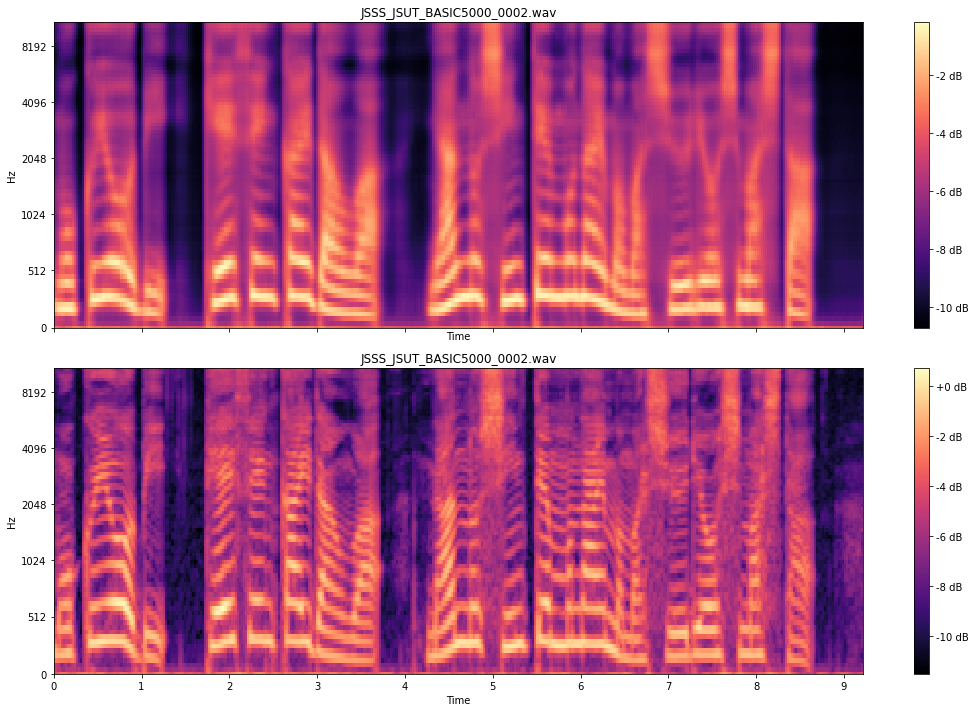

In [91]:
from utils.utils import plot_mels, get_mels
import yaml
import numpy as np

mel = np.load("./output/mel_for_hifi-gan/jsut_jsss_jvs/mels/JSSS_JSUT_BASIC5000_0002.npy")

preprocess_config = yaml.load(
        open("./config/jsut_jsss_jvs/preprocess.yaml", "r", encoding='utf-8'), Loader=yaml.FullLoader
    )

mel_before = get_mels(["./pre_voice/jsut_jsss_jvs/target/JSSS_JSUT_BASIC5000_0002.wav"], 80, preprocess_config)


plot_mels([mel, *mel_before], ["./pre_voice/jsut_jsss_jvs/target/JSSS_JSUT_BASIC5000_0002.wav"]*2, 22050)

In [3]:
import json
import os 

import numpy as np 
import matplotlib.pyplot as plt

from utils.tools import plot_mel

with open(
    "./preprocessed_data/jsut_jsss_jvs/target/stats.json"
) as f:
    stats = json.load(f)
    stats = stats["pitch"] + stats["energy"][:2]

file_name = "jvs037_jvs049_045"
file_base = "./preprocessed_data/jsut_jsss_jvs/target"

mel = np.load(os.path.join(file_base, "mel", "mel-"+file_name+".npy"))
pitch = np.load(os.path.join(file_base, "pitch", "pitch-"+file_name+".npy"))
energy = np.load(os.path.join(file_base, "energy", "energy-"+file_name+".npy"))

# pltとして, figを用意.
fig = plot_mel(
    [
        (mel.T, pitch, energy),
    ],
    stats,
    ["source Spectrogram"],
)
plt.savefig(f"{file_name}.png")
plt.close()

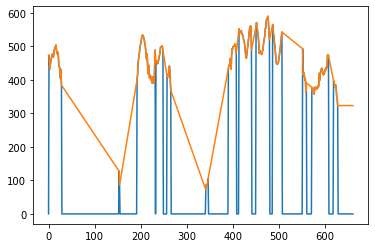

In [4]:
# continuous pitch 実装
import pyworld as pw
import numpy as np
import librosa
import matplotlib.pyplot as plt

wav_path = "./pre_voice/N2C/target/n_c_beyond_tokkun-08.wav"
sampling_rate = 22050
hop_length = 256

wav, _ = librosa.load(wav_path, sr=sampling_rate)

# Compute fundamental frequency
pitch, t = pw.dio(
    wav.astype(np.float64),
    sampling_rate,
    frame_period=hop_length / sampling_rate * 1000,
)
pitch = pw.stonemask(wav.astype(np.float64), pitch, t, sampling_rate)

plt.plot(pitch)

pitch = np.where(pitch < 1e-6, np.nan, pitch)

import pandas as pd 

df = pd.Series(pitch)
df = df.interpolate()

first_value = pitch[df.isnull().values.tolist().index(False)]
df = df.fillna(first_value)

pitch = df.values
plt.plot(pitch)
plt.show()


In [1]:
import json
import os 

import numpy as np 
import matplotlib.pyplot as plt

from utils.tools import plot_mel

with open(
    "./preprocessed_data/N2C_3/target/stats.json"
) as f:
    stats = json.load(f)
    stats = stats["energy"]

file_name = "n_c_beyond_tokkun-08"
file_base = "./preprocessed_data/N2C_3/target"

mel = np.load(os.path.join(file_base, "mel", "mel-"+file_name+".npy"))
pitch = np.load(os.path.join(file_base, "pitch", "pitch-"+file_name+".npy"))
energy = np.load(os.path.join(file_base, "energy", "energy-"+file_name+".npy"))


energy_min, energy_max, energy_mean, energy_std = stats

energy = energy * energy_std + energy_mean

plt.plot(energy)
plt.show()

energy = np.where(energy < -4)

pitch[energy] = np.min(pitch)

plt.plot(pitch)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './preprocessed_data/N2C_3/target/stats.json'

100%|██████████| 2/2 [00:00<00:00, 11.98it/s]


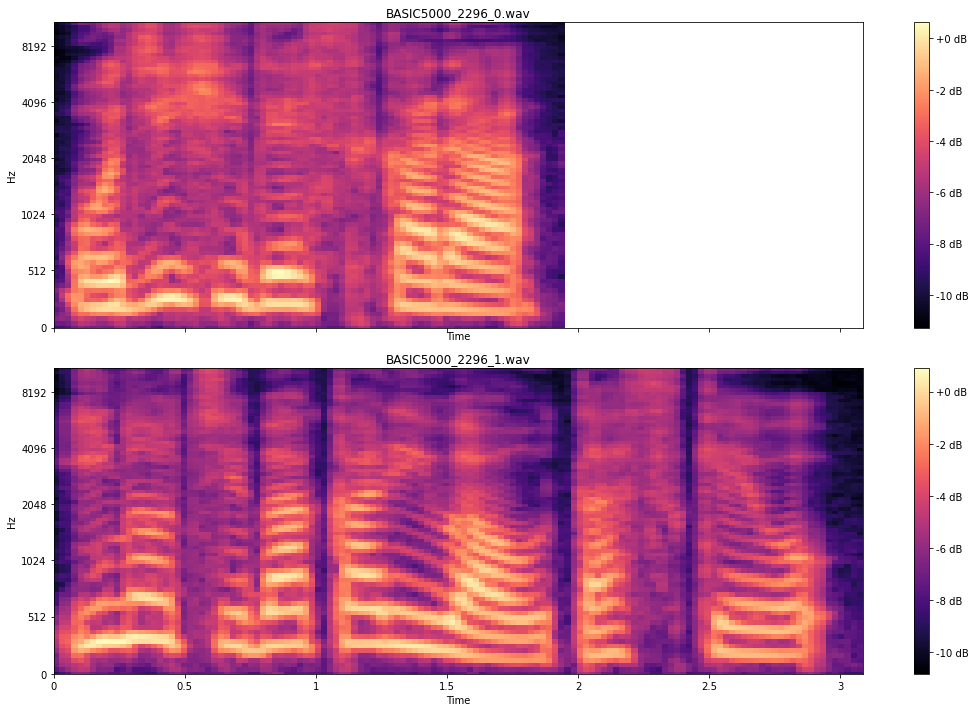

In [3]:
from preprocessing.n2c_voiceprocess import devide_voice_from_path, delete_novoice_from_path
from utils.utils import plot_mels
import yaml 

input_wav_path = "./pre_voice/JSUT_JSSS/JSSS/BASIC5000_2296.wav"

preprocess_config = yaml.load(
        open("./config/jsut_jsss_jvs/preprocess.yaml", "r", encoding='utf-8'), Loader=yaml.FullLoader
    )

devide_voice_from_path(input_wav_path, "./", preprocess_config)

output_wav_path = ["./BASIC5000_2296_0.wav", "./BASIC5000_2296_1.wav"]
for path_ in output_wav_path:
    delete_novoice_from_path(path_, "./", preprocess_config)

plot_mels(output_wav_path, config=preprocess_config)


0.01
-4.605170185988091
[  2.4081156    3.0496552    3.0348964    3.0551538    3.0022204
   2.2740111    1.2076256    0.72654533  -0.25344414  -5.634016
 -13.815511   -13.815511   -13.815511   -13.815511   -13.815511
 -13.815511   -13.815511   -13.815511   -13.815511   -13.815511
 -13.815511   -13.815511    -1.5777061    0.56686157   1.2853217
   1.1516479    1.5982698    2.1786473    2.11946      1.7993792
   2.2985327    3.1467633    3.2091172    3.228384     3.2675798
   3.0852127    2.8576474    3.091816     2.9389722    2.3032305
   1.724654     1.8623927    1.4927139    2.768542     3.1500897
   3.0079665    2.660122     1.9704529    0.44041878  -0.2693008
  -1.0791041   -5.559528   -13.815511   -13.815511   -13.815511
 -13.815511   -13.815511   -13.815511   -13.815511   -13.815511
 -13.815511   -13.815511   -13.815511   -13.815511   -13.815511
 -13.815511   -13.815511   -13.815511   -13.815511   -13.815511
 -13.815511   -13.815511   -13.815511   -13.815511   -13.815511
 -13.8155

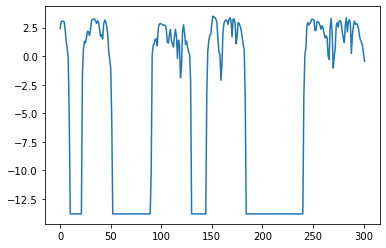

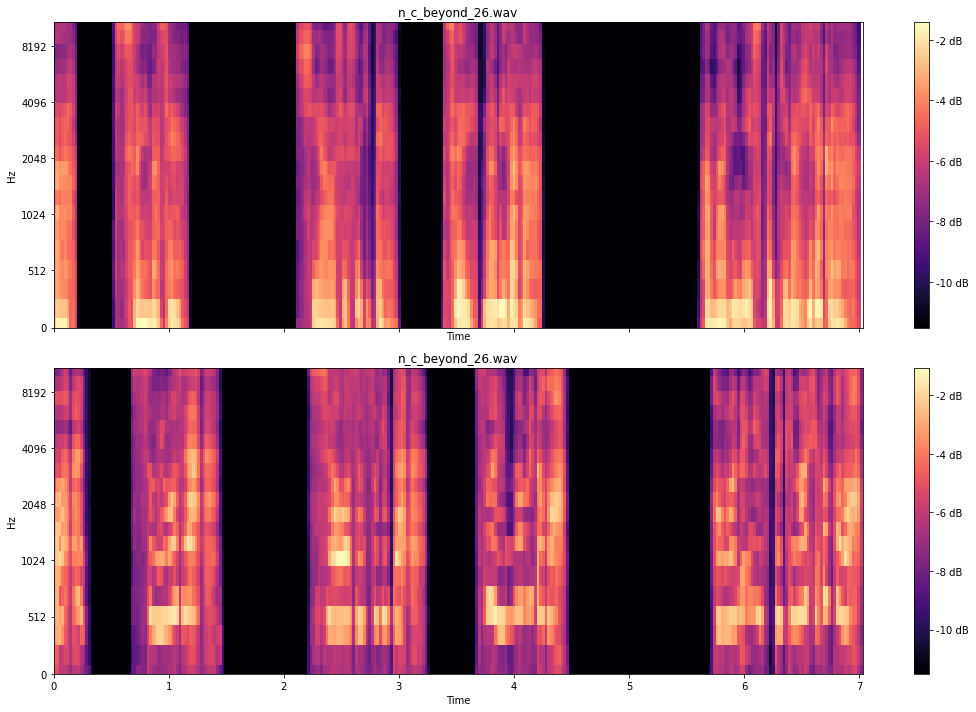

In [26]:
import librosa
import yaml
import matplotlib.pyplot as plt
import numpy as np 

import audio as Audio
from preprocessing.calc_duration import reduction, calc_duration
from utils.utils import plot_mels

source_path = "./pre_voice/N2C/source/n_c_beyond_26.wav"
target_path = "./pre_voice/N2C/target/n_c_beyond_26.wav"

p_config = yaml.load(
        open("./config/jsut_jsss_jvs/preprocess.yaml", "r", encoding='utf-8'), Loader=yaml.FullLoader
    )

STFT = Audio.stft.TacotronSTFT(
        p_config["preprocessing"]["stft"]["filter_length"],
        p_config["preprocessing"]["stft"]["hop_length"],
        p_config["preprocessing"]["stft"]["win_length"],
        20,  # config["preprocessing"]["mel"]["n_mel_channels"]のところ.
        p_config["preprocessing"]["audio"]["sampling_rate"],
        p_config["preprocessing"]["mel"]["mel_fmin"],
        p_config["preprocessing"]["mel"]["mel_fmax"],
    )
reduction_factor = 3
source_wav, _ = librosa.load(
    source_path, sr=p_config["preprocessing"]["audio"]["sampling_rate"])
target_wav, _ = librosa.load(
    target_path, sr=p_config["preprocessing"]["audio"]["sampling_rate"])
source_mel, energy = Audio.tools.get_mel_from_wav(source_wav, STFT)
target_mel, _ = Audio.tools.get_mel_from_wav(target_wav, STFT)

source_mel = reduction(source_mel, reduction_factor)
energy = reduction(energy, reduction_factor)
print(10**(-40/20))
print(np.log(10**(-40/20)))

print(np.log(energy+1e-6))

plt.plot(np.log(energy+1e-6))
target_mel = reduction(target_mel, reduction_factor)

plot_mels(wav_paths=[source_path, target_path], mels=[source_mel, target_mel])

duration = calc_duration([target_mel, source_mel], target_path, np.log(energy+1e-6) < -4)

[ -0.16224545   3.202595     4.003646     4.0900044    2.8916414
   3.497139     4.0596476    3.1737587    2.620873     3.885173
   3.5234215    3.4085088    4.3871856    3.686773     2.2204742
   2.0781417    1.5561441    0.7757095    2.4534287    3.9221592
   4.010485     3.6403372    4.085613     4.0560346    3.880363
   2.6734252    0.5809874   -2.2373676   -2.716354    -7.0168877
 -13.815511   -13.815511   -13.815511   -13.815511   -13.815511
 -13.815511    -5.2933936    0.9120544    3.5720007    4.360223
   4.3228784    4.358894     4.269687     3.4034648    0.9397141
   1.9288119    3.4473116    3.4022748    3.7311678    4.4215703
   3.7919016    0.5558933    2.7900105    4.1974716    4.161992
   3.9173298    3.9931421    3.9379044    4.118751     4.290829
   4.2147527    3.983801     3.5360687    3.1800616    1.0515076
   1.5772794    3.7532492    3.3284955    2.0545716    2.254313
   1.6750787   -0.12006416   1.3776263    3.5927615    3.4787745
   3.449168     3.4429266    3.3

100%|██████████| 1/1 [00:00<00:00,  6.83it/s]


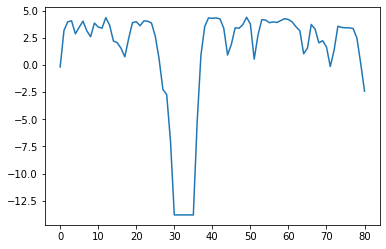

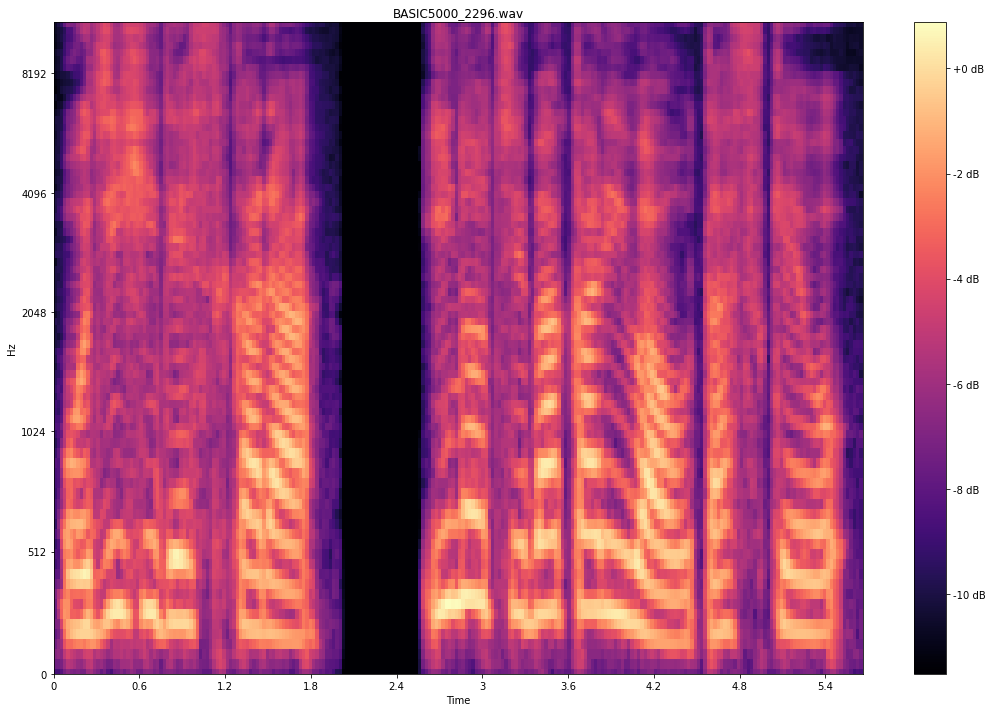

In [27]:
input_wav_path = "./BASIC5000_2296.wav"
# input_wav_path = "./pre_voice/JSUT_JSSS/JSSS/BASIC5000_2296.wav"

p_config = yaml.load(
        open("./config/jsut_jsss_jvs/preprocess.yaml", "r", encoding='utf-8'), Loader=yaml.FullLoader
    )

STFT = Audio.stft.TacotronSTFT(
        p_config["preprocessing"]["stft"]["filter_length"],
        p_config["preprocessing"]["stft"]["hop_length"],
        p_config["preprocessing"]["stft"]["win_length"],
        20,  # config["preprocessing"]["mel"]["n_mel_channels"]のところ.
        p_config["preprocessing"]["audio"]["sampling_rate"],
        p_config["preprocessing"]["mel"]["mel_fmin"],
        p_config["preprocessing"]["mel"]["mel_fmax"],
    )
reduction_factor = 3
source_wav, _ = librosa.load(
    input_wav_path, sr=p_config["preprocessing"]["audio"]["sampling_rate"])
source_mel, energy = Audio.tools.get_mel_from_wav(source_wav, STFT)
source_mel = reduction(source_mel, reduction_factor)
energy = reduction(energy, reduction_factor)

print(np.log(energy+1e-6))
plt.plot(np.log(energy+1e-6))
plot_mels(wav_paths=[input_wav_path], config=p_config)


100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


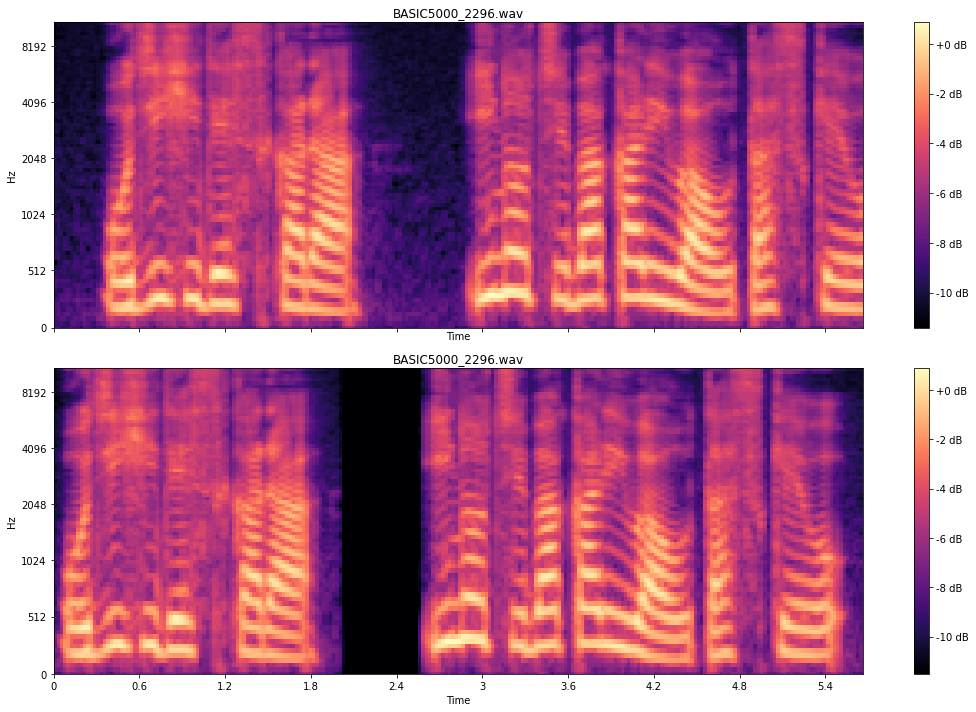

In [23]:
from pydub import AudioSegment, silence
import os.path as opth

input_wav_path = "./pre_voice/JSUT_JSSS/JSSS/BASIC5000_2296.wav"

def delete_novoice_from_path(input_path, output_path, preprocess_config, chunk_size=50):
    """無音区間を先頭と末尾から削除します.
    Args:
      input_path: wavファイルへのpath
      output_path: wavファイルを貯めたい場所. ファイル名はinput_pathのbasenameからとる.
      chunk_size: 削除に用いる音声の最小単位. 基本defaultのままで良さそう.
    """
    silence_thresh = preprocess_config["preprocessing"]["audio"]["silence_thresh"]
    silence_thresh_h = preprocess_config["preprocessing"]["audio"]["silence_thresh_head"]

    if (silence_thresh_h is not None) and (silence_thresh_h < silence_thresh):
        print("Warning: 基本的に, silene_thresh_hの方が, silence_threshよりも大きいべきです.")

    audio = AudioSegment.from_wav(input_path)

    # 参考: https://stackoverflow.com/questions/29547218/
    # remove-silence-at-the-beginning-and-at-the-end-of-wave-files-with-pydub
    def detect_leading_silence(sound, silence_threshold=-50.0, chunk_size=10):
        trim_ms = 0  # ms

        assert chunk_size > 0  # to avoid infinite loop
        while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
            trim_ms += chunk_size

        return trim_ms

    if silence_thresh_h is None:
        silence_thresh_h = silence_thresh

    start_trim = detect_leading_silence(audio, silence_threshold=silence_thresh_h, chunk_size=chunk_size)
    end_trim = detect_leading_silence(audio.reverse(),
                                      silence_threshold=silence_thresh, chunk_size=chunk_size)

    duration = len(audio)
    audio_cut = audio[start_trim:duration-end_trim]
    silences = silence.detect_silence(audio_cut, min_silence_len=50, silence_thresh=silence_thresh)

    audio_cut_new = AudioSegment.empty()
    s_index = 0
    for silence_ in silences:
        audio_cut_new += audio_cut[s_index:silence_[0]]
        audio_cut_new += AudioSegment.silent(duration=silence_[1]-silence_[0])
        s_index = silence_[1]

    audio_cut_new += audio_cut[s_index:]
    audio_cut_new.export(opth.join(output_path, opth.basename(input_path)), format="wav")

delete_novoice_from_path(input_wav_path, './', p_config)
plot_mels(wav_paths=[input_wav_path, "./BASIC5000_2296.wav"], config=p_config)
